In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

## Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Heart.CSV\heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe(include="all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

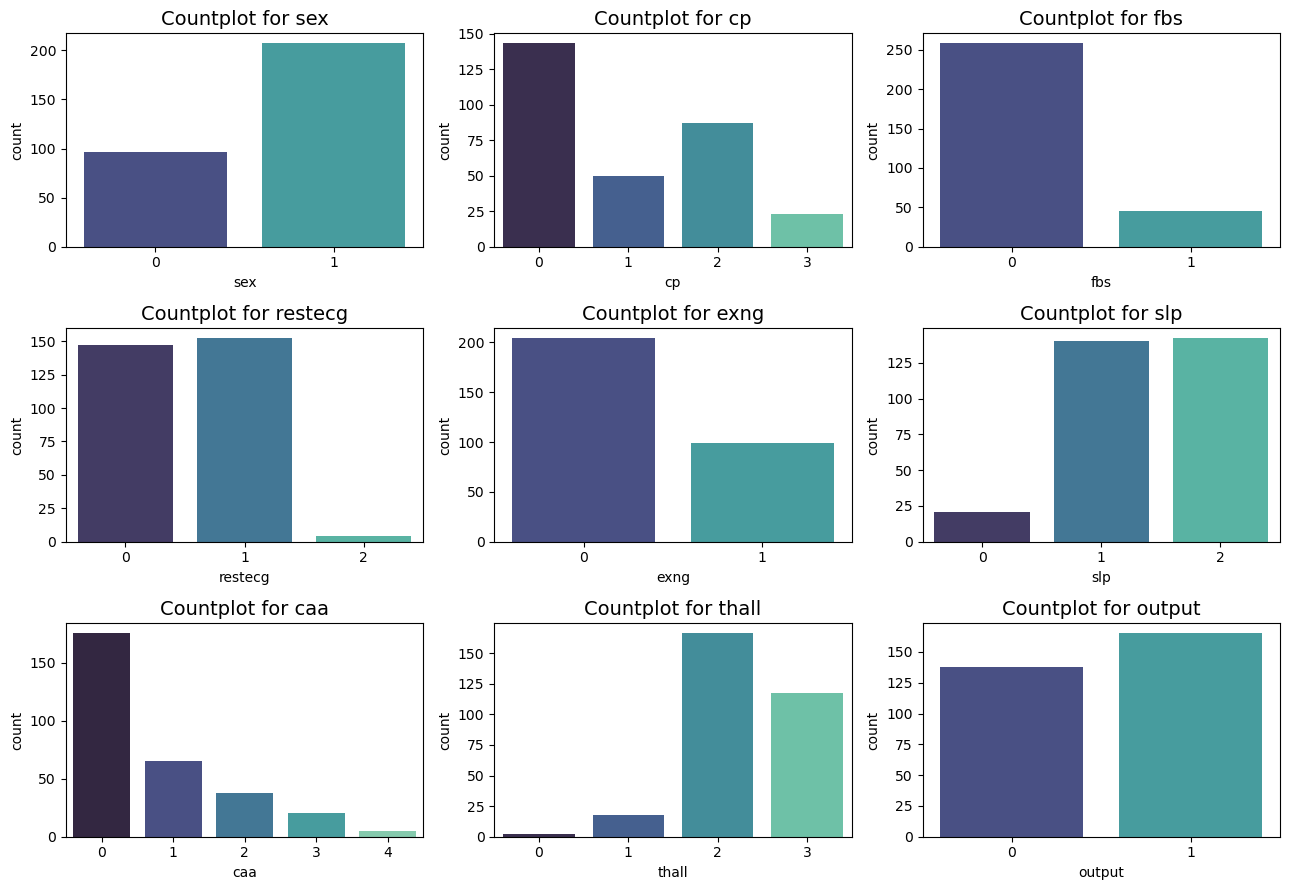

In [27]:
# Creating a list of categorical features 
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Create a figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(13, 9))

# Loop through the subplots and create countplots for each feature
for feature, ax in zip(cat_features, axes.flatten()):
    sns.countplot(data=df, x=feature, ax=ax, palette="mako")
    ax.set_title(f'Countplot for {feature}', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**insights: Most of the categorical features are imbalanced**

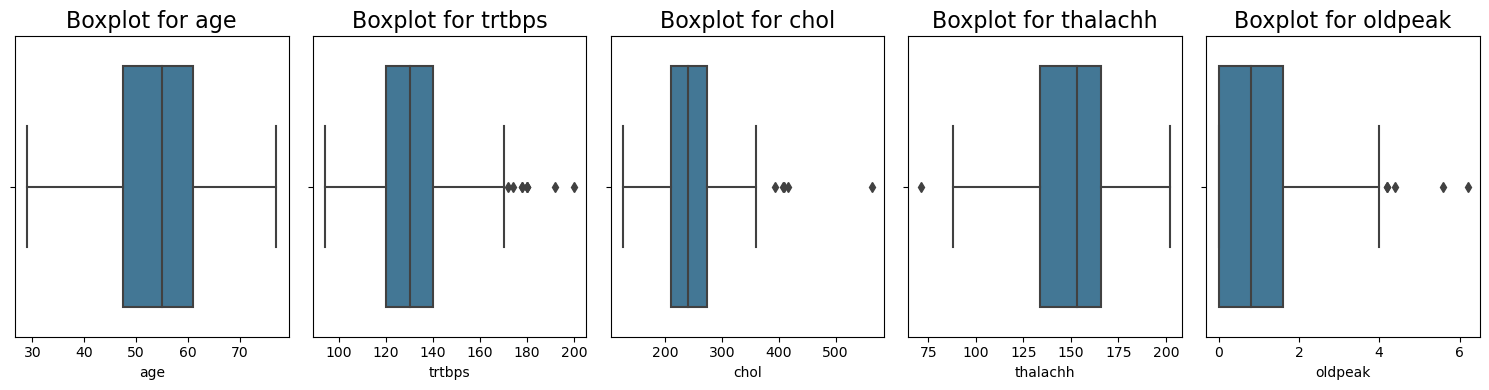

In [28]:
# numerical column 
# Creating a list of continuous features 
cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Loop through the subplots and create boxplots for each feature
for feature, ax in zip(cont_features, axes):
    sns.boxplot(data=df, x=feature, ax=ax, palette="mako")
    ax.set_title(f'Boxplot for {feature}', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**Insights:  the "minor outliers" detected in the continuous features are values that fall outside the typical range seen in most of the data. However, they still align with the general patterns and trends observed in the dataset. These outliers are not considered errors in the data; rather, they represent rare occurrences or exceptions that are consistent with the overall behavior of the dataset. Therefore, they are not cause for concern and can be safely retained in the analysis.**

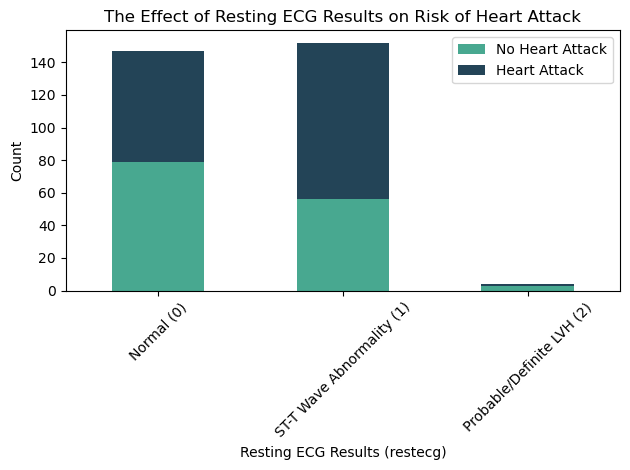

In [31]:
# Grouping data by 'restecg' and 'output' and counting occurrences
restecg_output_counts = df.groupby(['restecg', 'output']).size().unstack()

# Plotting the histogram
restecg_output_counts.plot(kind='bar', stacked=True, color=['#48a890', '#234457'])

# Customizing labels and title
plt.xlabel('Resting ECG Results (restecg)')
plt.ylabel('Count')
plt.title('The Effect of Resting ECG Results on Risk of Heart Attack')

# Customizing x-axis tick labels
plt.xticks(range(3), ['Normal (0)', 'ST-T Wave Abnormality (1)', 'Probable/Definite LVH (2)'], rotation=45)

# Adding legend
plt.legend(['No Heart Attack', 'Heart Attack'], loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

**Insights:People with restecg type 1 (ST-T Wave Abnormality) are more prone to heart attacks.**

##  Multivariate Analysis

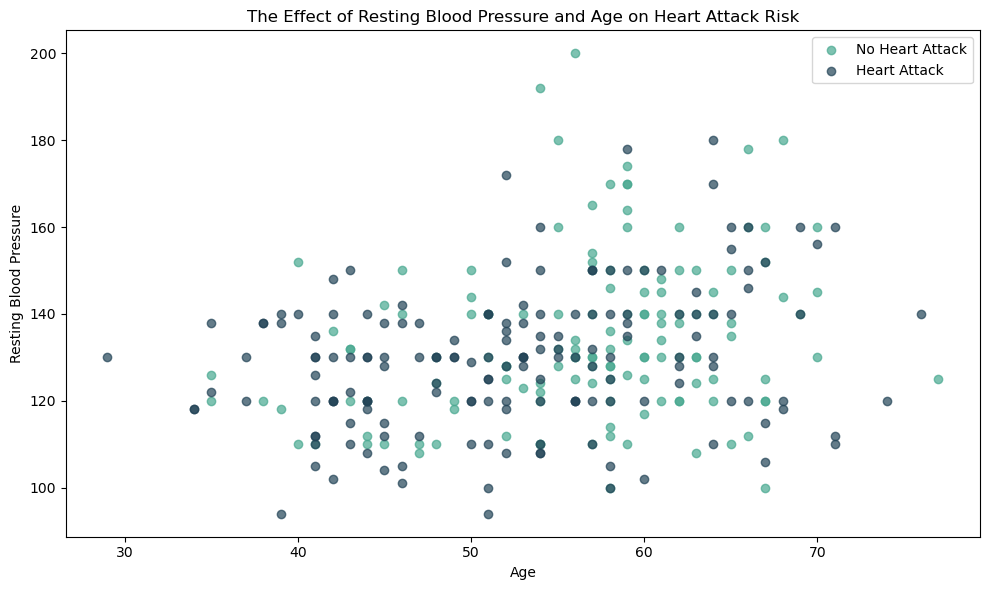

In [32]:
# The Effect of Resting Blood Pressure (trtbps) and Age on Heart Attack Risk
# Separate data for heart attack cases and non-heart attack cases
heart_attack = df[df['output'] == 1]
no_heart_attack = df[df['output'] == 0]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(no_heart_attack['age'], no_heart_attack['trtbps'], color='#48a890', label='No Heart Attack', alpha=0.7)
plt.scatter(heart_attack['age'], heart_attack['trtbps'], color='#234457', label='Heart Attack', alpha=0.7)

# Customizing labels and title
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('The Effect of Resting Blood Pressure and Age on Heart Attack Risk')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Insights:The scatter plot shows a positive correlation between age and resting blood pressure, with older people having higher resting blood pressure, potentially increasing their risk of heart attacks.**

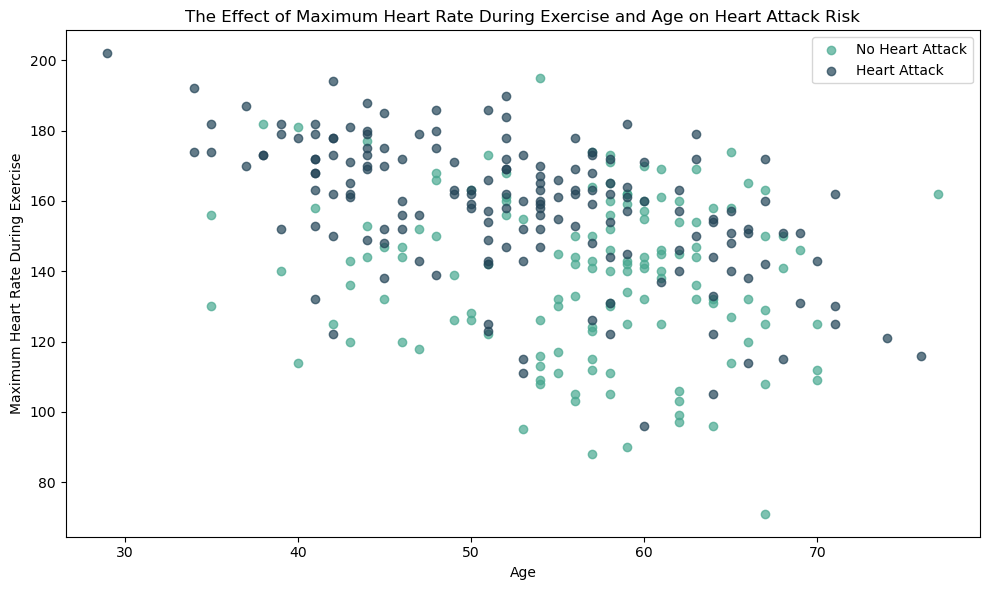

In [33]:
# Maximum Heart Rate During Exercise (thalachh) and Age on Heart Attack Risk
# Separate data for heart attack cases and non-heart attack cases
heart_attack = df[df['output'] == 1]
no_heart_attack = df[df['output'] == 0]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(no_heart_attack['age'], no_heart_attack['thalachh'], color='#48a890', label='No Heart Attack', alpha=0.7)
plt.scatter(heart_attack['age'], heart_attack['thalachh'], color='#234457', label='Heart Attack', alpha=0.7)

# Customizing labels and title
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate During Exercise')
plt.title('The Effect of Maximum Heart Rate During Exercise and Age on Heart Attack Risk')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Insigghts:the scatter plot reveals that as people get older, their maximum heart rate during exercise tends to decrease. This pattern suggests a negative correlation between age and maximum heart rate. For older individuals, having a lower maximum heart rate during exercise might increase their risk of heart attacks.**

In [7]:
x=df['output']

In [8]:
x.shape

(303,)

In [9]:
fv=df.drop('output',axis=1)

In [10]:
fv.shape

(303, 13)

In [12]:
fv

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
cv=df.iloc[:,-1]

In [11]:
cv

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=143,stratify=cv)

In [13]:
x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2


In [14]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3


In [15]:
scaler=StandardScaler()

In [16]:
x_train=scaler.fit_transform(x_train)

In [17]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012007,0.702728,-0.959565,1.549629,0.852598,-0.438313,-0.977743,-0.189893,1.436416,-0.231837,-0.667736,0.225411,1.115890
1,-1.105588,0.702728,2.017546,-1.252719,0.348620,-0.438313,0.930433,-0.762669,-0.696177,0.105127,-0.667736,-0.748686,1.115890
2,-0.546790,-1.423025,0.032806,-0.692249,-0.054563,-0.438313,0.930433,0.559121,-0.696177,0.020886,0.948185,-0.748686,-0.593258
3,0.012007,-1.423025,0.032806,-0.019686,1.921032,-0.438313,0.930433,0.735359,-0.696177,0.105127,0.948185,-0.748686,-0.593258
4,0.906083,0.702728,-0.959565,-0.131780,1.679122,2.281475,-0.977743,-0.762669,1.436416,0.610573,0.948185,2.173606,1.115890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.347286,0.702728,-0.959565,0.764971,-0.578700,-0.438313,0.930433,-1.952280,-0.696177,0.779055,-0.667736,0.225411,1.115890
238,0.459045,0.702728,2.017546,0.092408,-0.860928,-0.438313,0.930433,0.559121,-0.696177,-0.231837,0.948185,1.199508,-0.593258
239,-2.334943,-1.423025,0.032806,-0.804343,-0.739973,-0.438313,0.930433,1.880910,-0.696177,-0.316078,0.948185,-0.748686,-0.593258
240,1.017843,0.702728,-0.959565,-0.692249,-0.014245,-0.438313,-0.977743,-2.348816,1.436416,0.947537,-2.283657,0.225411,-0.593258


In [18]:
x_test=scaler.transform(x_test)

In [19]:
# Define pipelines for each model
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('knn', KNeighborsClassifier())  # KNN classifier
])

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('logistic', LogisticRegression())  # Logistic regression classifier
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('svc', SVC())  # Support Vector Classifier
])

In [20]:
from sklearn.metrics  import make_scorer
scoring={
    "accuracy":make_scorer(accuracy_score),
    "f1score":make_scorer(f1_score),
    "rocaucscore":make_scorer(roc_auc_score)
}

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

logistic_param_grid = {
    'logistic__C': [0.1, 1, 10],  # Regularization parameter
    'logistic__solver': ['liblinear', 'saga']  # Solver for optimization
}

svc_param_grid = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel type
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform GridSearchCV for each model
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5,scoring=scoring,refit="accuracy")
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=5,scoring=scoring,refit='accuracy')
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5,scoring=scoring,refit='accuracy')

# Assuming X_train and y_train are your training data
# Fit the grid search objects to the data
knn_grid_search.fit(x_train, y_train)
logistic_grid_search.fit(x_train, y_train)
svc_grid_search.fit(x_train, y_train)

# Get the best parameters and best score for each model
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best score for KNN:", knn_grid_search.best_score_)

print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best score for Logistic Regression:", logistic_grid_search.best_score_)

print("Best parameters for SVC:", svc_grid_search.best_params_)
print("Best score for SVC:", svc_grid_search.best_score_)


Best parameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Best score for KNN: 0.8427721088435375
Best parameters for Logistic Regression: {'logistic__C': 0.1, 'logistic__solver': 'liblinear'}
Best score for Logistic Regression: 0.8430272108843537
Best parameters for SVC: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best score for SVC: 0.859608843537415


In [ ]:
pickle.dump(svc_grid_search,open(r"C:\Users\ADMIN\Documents\ML\svc.pickle","wb"))

In [22]:
svc=SVC()
model=svc.fit(x_train,y_train)

In [23]:
import numpy as np

# Example query point with features
query_point = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

print("Query point:", query_point)


Query point: [[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]]


In [24]:
knn_prediction = knn_grid_search.predict(query_point)
logistic_prediction = logistic_grid_search.predict(query_point)
svc_prediction = svc_grid_search.predict(query_point)

print("KNN Prediction:", knn_prediction)
print("Logistic Regression Prediction:", logistic_prediction)
print("SVC Prediction:", svc_prediction)

KNN Prediction: [0]
Logistic Regression Prediction: [1]
SVC Prediction: [0]
